# Connect drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Convert the ClarTTS data in this format as the model Expect that
link: https://huggingface.co/datasets/MBZUAI/ClArTTS

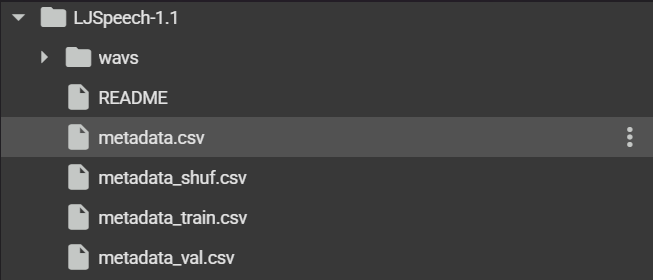

In [ ]:
import os
import pyarrow.parquet as pq
import soundfile as sf
import numpy as np
import pandas as pd
from glob import glob
from tqdm import tqdm
import random

# Set base paths
base_dir = "/content/ClarTTS_csv"
wavs_dir = os.path.join(base_dir, "wavs")
os.makedirs(wavs_dir, exist_ok=True)

# File lists
data_dir = "/content/ClArTTS/data"  # adjust if needed
train_files = sorted(glob(os.path.join(data_dir, "train-*.parquet")))
test_files = sorted(glob(os.path.join(data_dir, "test-*.parquet")))

metadata_all = []
metadata_test = []
val_count = 300
file_index = 1

def process_parquet(file_list, is_test=False):
    global file_index
    metadata_local = []
    for parquet_file in file_list:
        parquet_data = pq.ParquetFile(parquet_file)
        for batch in parquet_data.iter_batches():
            df = batch.to_pandas()
            for _, row in df.iterrows():
                file_id = f"CT001-{file_index:04d}"
                wav_file = f"{file_id}.wav"
                wav_path = os.path.join(wavs_dir, wav_file)

                audio = np.array(row["audio"], dtype=np.float32)
                sr = row["sampling_rate"]
                sf.write(wav_path, audio, sr)

                text = row["text"].replace("\n", " ").strip()
                line = f"{file_id}|{text}|{text}"

                metadata_all.append(line)
                if is_test:
                    metadata_test.append(line)
                else:
                    metadata_local.append(line)
                file_index += 1
    return metadata_local

# Process train and test separately
print("🔄 Processing training data...")
metadata_train_all = process_parquet(train_files, is_test=False)

print("🔄 Processing test data...")
_ = process_parquet(test_files, is_test=True)

# Create validation set
metadata_val = metadata_train_all[:val_count]
metadata_train = metadata_train_all[val_count:]

# Write all metadata files
def write_metadata(filename, lines):
    with open(os.path.join(base_dir, filename), "w", encoding="utf-8") as f:
        f.write("\n".join(lines))

write_metadata("metadata.csv", metadata_all)
write_metadata("metadata_train.csv", metadata_train)
write_metadata("metadata_val.csv", metadata_val)
write_metadata("metadata_test.csv", metadata_test)

# Create and write shuffled metadata
metadata_shuf = metadata_all.copy()
random.shuffle(metadata_shuf)
write_metadata("metadata_shuf.csv", metadata_shuf)

print("✅ All files created successfully with low RAM usage.")

# Repo that have the preprocess script

In [ ]:
!git clone https://github.com/tuanh123789/Spark-TTS-finetune

In [ ]:
%cd Spark-TTS-finetune

/content/Spark-TTS-finetune


# Install requierements

In [ ]:
!pip install -U packaging setuptools wheel ninja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 32.9 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
langchain-core 0.3.63 requires packaging<25,>=23.2, but you have packaging 25.0 which is incompatible.


In [ ]:
!pip install --no-build-isolation axolotl[flash-attn,deepspeed]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.4/312.4 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 37.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 119.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4

In [ ]:
%cd /content/Spark-TTS-finetune

/content/Spark-TTS-finetune


In [ ]:
!pip install -r requirement.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.0/103.0 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 kB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.5/906.5 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 120.2 MB/s eta 0:00:00
   ━━━

In [ ]:
!python -m src.download_pretrain

In [ ]:
!pip install torch==2.1.2 torchvision==0.16.2 transformers==4.38.2 torchaudio==2.1.2 sentence-transformers==2.2.2 --extra-index-url https://download.pytorch.org/whl/cu118

In [ ]:
%cd /content/Spark-TTS-finetune

/content/Spark-TTS-finetune


# preprocess
- will create jsonl file for the whole data   

In [ ]:
!python -m src.process_data --data_dir {"/content/drive/MyDrive/clar_csv"} --output_dir {"/content/drive/MyDrive/clar_csv"}